# Geometric Transform

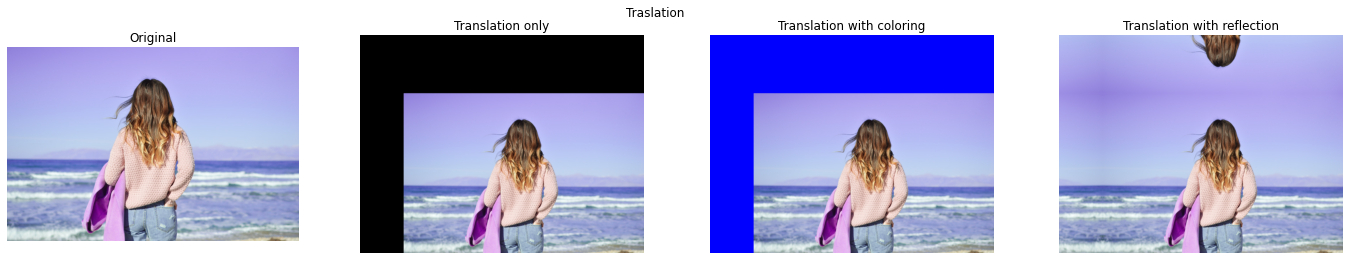

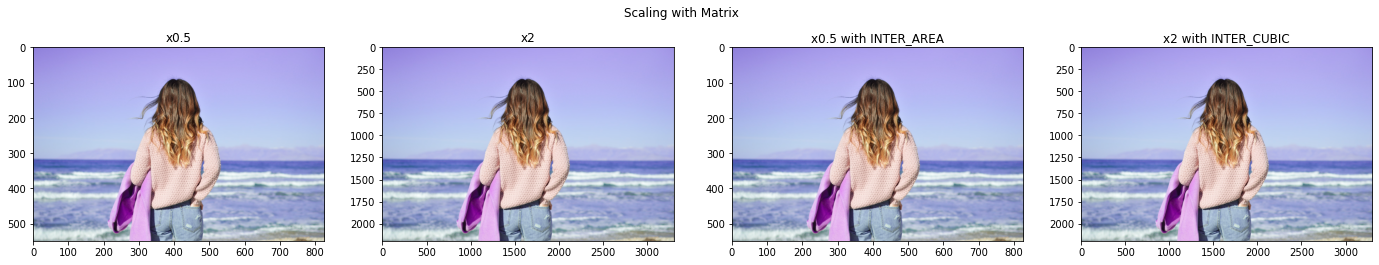

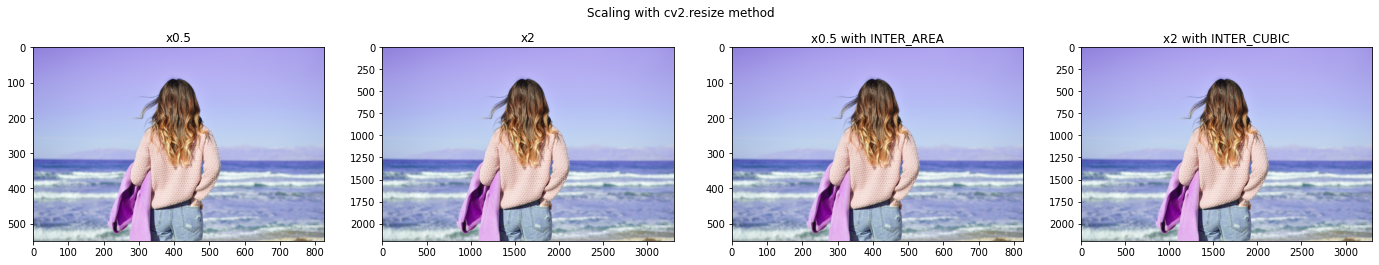

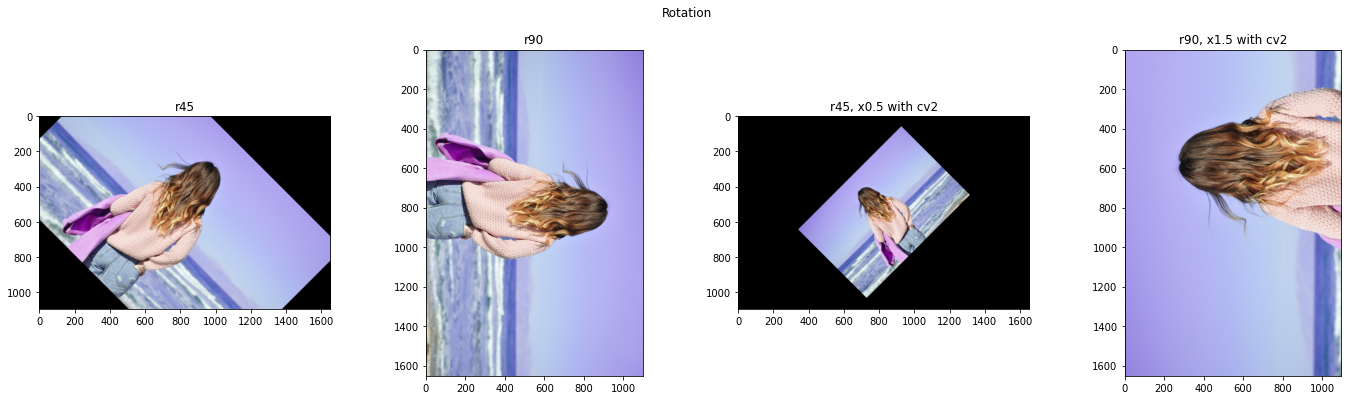

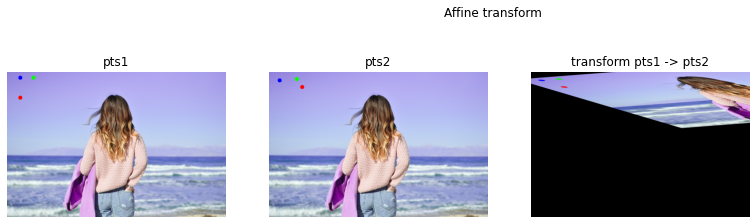

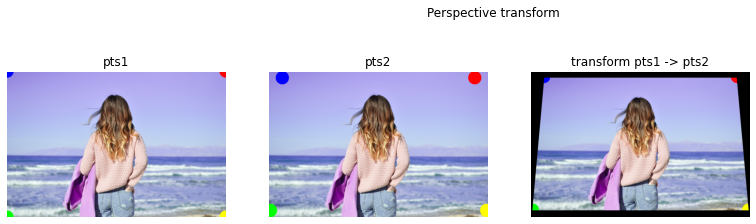

In [27]:
"""
import urllib.request
url = 'https://images.unsplash.com/photo-1515052945961-bbb80118b74b?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1652&q=80'
filename = './image/back.jpg'
urllib.request.urlretrieve(url, filename)
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./image/back.jpg')
rows, cols = img.shape[0:2]

"""
Traslation
"""
dx, dy = 300, 400

matrix = np.float32([[1,0,dx],
                   [0,1,dy]])

dst = cv2.warpAffine(img, matrix, (cols+dx, rows+dy))

dst2 = cv2.warpAffine(img, matrix, (cols+dx, rows+dy), None, \
                     cv2.INTER_LINEAR, cv2.BORDER_CONSTANT, (255,0,0))

dst3 = cv2.warpAffine(img, matrix, (cols+dx, rows+dy), None, \
                     cv2.INTER_LINEAR, cv2.BORDER_REFLECT, (255,0,0))

imgs = {'Original' : img, 
        'Translation only': dst, 
        'Translation with coloring': dst2, 
        'Translation with reflection': dst3}

plt.figure(figsize=(24,4))
plt.suptitle("Traslation")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
    
plt.show()


"""
Scaling
"""

matrix_x0_5 = np.float32([[0.5,  0, 0],
                          [  0,0.5, 0]])
matrix_x2 = np.float32([[2, 0, 0],
                        [0, 2, 0]])

dst1 = cv2.warpAffine(img, matrix_x0_5, (int(cols*0.5), int(rows*0.5)))
dst2 = cv2.warpAffine(img, matrix_x2, (int(cols*2), int(rows*2)))
dst3 = cv2.warpAffine(img, matrix_x0_5, (int(cols*0.5), int(rows*0.5)), \
                      None, cv2.INTER_AREA)
dst4 = cv2.warpAffine(img, matrix_x2, (int(cols*2), int(rows*2)), \
                      None, cv2.INTER_CUBIC)

imgs = {'x0.5' : dst1, 
        'x2': dst2, 
        'x0.5 with INTER_AREA': dst3, 
        'x2 with INTER_CUBIC': dst4}

plt.figure(figsize=(24,4))
plt.suptitle("Scaling with Matrix")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    
plt.show()


dst1 = cv2.resize(img, (int(cols*0.5), int(rows*0.5)))
dst2 = cv2.resize(img, None, None, 2, 2)
dst3 = cv2.resize(img, (int(cols*0.5), int(rows*0.5)), interpolation=cv2.INTER_AREA)
dst4 = cv2.resize(img, None, None, 2, 2, cv2.INTER_CUBIC)

imgs = {'x0.5' : dst1, 
        'x2': dst2, 
        'x0.5 with INTER_AREA': dst3, 
        'x2 with INTER_CUBIC': dst4}

plt.figure(figsize=(24,4))
plt.suptitle("Scaling with cv2.resize method")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
plt.show()

"""
Rotation
"""
d45 = 45.0 * np.pi / 180.0
d90 = 90.0 * np.pi / 180.0

m45 = np.float32( [[np.cos(d45), -1*np.sin(d45), rows//2],
                   [np.sin(d45), np.cos(d45), -1*cols//4]])
m90 = np.float32( [[np.cos(d90), -1*np.sin(d90), rows],
                   [np.sin(d90), np.cos(d90), 0]])
m45_cv = cv2.getRotationMatrix2D((cols/2, rows/2),45,0.5)
m90_cv = cv2.getRotationMatrix2D((cols/2, rows/2),90,1.5)

r45 = cv2.warpAffine(img, m45, (cols, rows))
r90 = cv2.warpAffine(img, m90, (rows, cols))
r45_cv = cv2.warpAffine(img, m45_cv, (cols, rows))
r90_cv = cv2.warpAffine(img, m90_cv, (rows, cols))

imgs = {'r45' : r45, 
        'r90': r90, 
        'r45, x0.5 with cv2': r45_cv, 
        'r90, x1.5 with cv2': r90_cv}

plt.figure(figsize=(24,6))
plt.suptitle("Rotation")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
plt.show()

"""
Affine transform
"""

pts1 = np.float32([[100, 50],[200,50],[100,200]])
pts2 = np.float32([[80, 70],[210,60],[250,120]])

img_pts1 = img.copy()
img_pts2 = img.copy()

cv2.circle(img_pts1, (100,50), 15, (255,0), -1)
cv2.circle(img_pts1, (200,50), 15, (0,255,0), -1)
cv2.circle(img_pts1, (100,200), 15, (0,0,255), -1)

cv2.circle(img_pts2, (80,70), 15, (255,0), -1)
cv2.circle(img_pts2, (210,60), 15, (0,255,0), -1)
cv2.circle(img_pts2, (250,120), 15, (0,0,255), -1)

mat = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img_pts1, mat, (cols, rows))

imgs = {'pts1' : img_pts1, 
        'pts2': img_pts2, 
        'transform pts1 -> pts2': dst}

plt.figure(figsize=(18,4))
plt.suptitle("Affine transform")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()


"""
Perspective transform
"""

pts1 = np.float32([[0, 0],[0, rows],[cols, 0],[cols, rows]])
pts2 = np.float32([[100, 50],[10, rows-50],[cols-100, 50],[cols-10, rows-50]])

img_pts1 = img.copy()
img_pts2 = img.copy()

cv2.circle(img_pts1, (0,0), 50, (255,0), -1)
cv2.circle(img_pts1, (0,rows), 50, (0,255,0), -1)
cv2.circle(img_pts1, (cols,0), 50, (0,0,255), -1)
cv2.circle(img_pts1, (cols,rows), 50, (0,255,255), -1)

cv2.circle(img_pts2, (100,50), 50, (255,0), -1)
cv2.circle(img_pts2, (10,rows-50), 50, (0,255,0), -1)
cv2.circle(img_pts2, (cols-100,50), 50, (0,0,255), -1)
cv2.circle(img_pts2, (cols-10,rows-50), 50, (0,255,255), -1)

mat = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img_pts1, mat, (cols, rows))

imgs = {'pts1' : img_pts1, 
        'pts2': img_pts2, 
        'transform pts1 -> pts2': dst}

plt.figure(figsize=(18,4))
plt.suptitle("Perspective transform")
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))
    plt.title(k)
    plt.axis('off')
plt.show()